In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [96]:
path_dataset="../dataset"
path_cropped_dataset="../dataset/cropped/"

In [97]:
import os
img_dirs=[]
for entry in os.scandir(path_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [98]:
img_dirs

['../dataset\\aishwarya_rai',
 '../dataset\\alia_bhatt',
 '../dataset\\anushka_sharma',
 '../dataset\\deepika_padukon',
 '../dataset\\kareena_kapoor',
 '../dataset\\katrina_kaif',
 '../dataset\\kiara_advani',
 '../dataset\\preeti_zinta',
 '../dataset\\priyanka_chopra',
 '../dataset\\shraddha_kapoor',
 '../dataset\\shruti_hassan',
 '../dataset\\sonam_kapoor']

In [99]:
#function for getting cropped images with face and eye detected
def get_cropped_img(path):
    img=cv2.imread(path)
    if img is None:
        print(f"Error: Failed to load image at path: {path}")
        return None
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face=crop_face.detectMultiScale(gray,1.3,5)
    for x,y,w,h in face:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eye=crop_eye.detectMultiScale(roi_gray)
        if len(eye)>=2:
            return roi_color

In [100]:
import shutil
if os.path.exists(path_cropped_dataset):
    shutil.rmtree(path_cropped_dataset)
os.mkdir(path_cropped_dataset)

In [101]:
crop_face= cv2.CascadeClassifier('../opencv/haarcascade_frontalface_default.xml')
crop_eye= cv2.CascadeClassifier('../opencv/haarcascade_eye.xml')

In [102]:
cropped_img_dirs=[]
actress_file_name_dict={}

for img_dir in img_dirs:
    count=1
    actress_name= img_dir.split('\\')[-1]
    
    actress_file_name_dict[actress_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img(entry.path)
        if roi_color is not None:
            cropped_folder=path_cropped_dataset+ actress_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder"+ cropped_folder)
            
            cropped_file_name=actress_name+ str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            actress_file_name_dict[actress_name].append(cropped_file_path)
            count+=1

Error: Failed to load image at path: ../dataset\aishwarya_rai\.ipynb_checkpoints
Generating cropped images in folder../dataset/cropped/aishwarya_rai
Error: Failed to load image at path: ../dataset\aishwarya_rai\2607317-aishwarya-rai-doppelganger.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\74HVFT3DOMAO26PQJYBBU7YJBQ.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\874916-aishwaryaraibachchan-longines.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\aishwarya-21.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\aishwarya-jazbaa-story_647_100815042524.jpg_VersionId=dY916hqF1UnuU9k.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\aishwarya-rai-1.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\aishwarya-rai-doppelganger-6.jpg
Error: Failed to load image at path: ../dataset\aishwarya_rai\aishwarya_rai_1635714936454_1635714947134.jpg
Error: Failed to load image at path: ../dataset\aishwa

Error: Failed to load image at path: ../dataset\priyanka_chopra\926638_Wallpaper2.jpg
Error: Failed to load image at path: ../dataset\priyanka_chopra\927454_Wallpaper2.jpg
Error: Failed to load image at path: ../dataset\priyanka_chopra\com_lookaside_crawler_media_.jpg
Error: Failed to load image at path: ../dataset\priyanka_chopra\priyanka2_0.jpg
Error: Failed to load image at path: ../dataset\priyanka_chopra\priyankachopra759.jpg
Error: Failed to load image at path: ../dataset\priyanka_chopra\_f9a7e172-dbc3-11e6-84f6-f9b2ee092ea6.jpg
Generating cropped images in folder../dataset/cropped/shraddha_kapoor
Error: Failed to load image at path: ../dataset\shraddha_kapoor\306196-shraddha-2.jpg
Error: Failed to load image at path: ../dataset\shraddha_kapoor\767882.jpg
Error: Failed to load image at path: ../dataset\shraddha_kapoor\837723-shraddha-kapoor-rains-1.jpg
Error: Failed to load image at path: ../dataset\shraddha_kapoor\com_lookaside_crawler_media_.jpg
Error: Failed to load image at p

In [103]:
import numpy as np
# import pywt

In [19]:
# def w2d(img,mode="haar",level=1):
#     imarray=img
#     imarray=cv2.cvtColor(imarray,cv2.COLOR_RGB2GRAY)
#     imarray=np.float32(imarray)
#     imarray/=255;
    
#     coefs=pywt.wavedec2(imarray,mode,level=level)
#     coefs_h=list(coefs)
#     coefs_h[0]*=0;
    
#     imarray_h=pywt.waverec2(coefs_h,mode);
#     imarray_h*=255;
#     imarray_h=np.uint8(imarray_h)
    
#     return imarray_h

In [105]:
actress_dict={}
count=0
for actress_name in actress_file_name_dict.keys():
    if actress_name=='cropped':
        continue
    actress_dict[actress_name]=count
    count+=1
actress_dict

{'aishwarya_rai': 0,
 'alia_bhatt': 1,
 'anushka_sharma': 2,
 'deepika_padukon': 3,
 'kareena_kapoor': 4,
 'katrina_kaif': 5,
 'kiara_advani': 6,
 'preeti_zinta': 7,
 'priyanka_chopra': 8,
 'shraddha_kapoor': 9,
 'shruti_hassan': 10,
 'sonam_kapoor': 11}

In [128]:
#placing gray image as a stack below color image and forming X and Y
X=[]
Y=[]
for actress_name,training_files in actress_file_name_dict.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        
        if img is None:
            continue
        #scalling original coloured raw image
        scalled_raw_img=cv2.resize(img,(32,32))
#         img_har=w2d(img,'db1',5)
#         scalled_har_img=cv2.resize(img_har,(32,32))
        
#         combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),(scalled_har_img.reshape(32*32,1))))
        X.append(scalled_raw_img)
        Y.append(actress_dict[actress_name])

In [129]:
len(X)

714

In [137]:
Y=np.array(Y)
X=np.array(X)

In [138]:
X[0].shape

(32, 32, 3)

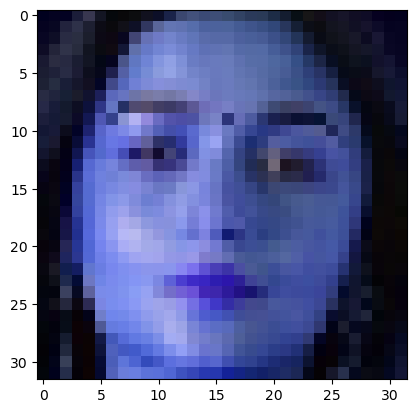

In [139]:
plt.imshow(X[100])

In [140]:
X=X/255

In [141]:
X.shape

(714, 32, 32, 3)

In [143]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# X=ss.fit_transform(X)

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [146]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [147]:
num_classes=len(actress_dict)
num_classes

12

In [148]:
model=keras.Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(30,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(45,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(num_classes)
])

In [150]:
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)
model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
18/18 [==============================] - 4s 45ms/step - loss: 2.4948 - accuracy: 0.0963
Epoch 2/500
18/18 [==============================] - 1s 43ms/step - loss: 2.5009 - accuracy: 0.0858
Epoch 3/500
18/18 [==============================] - 1s 43ms/step - loss: 2.4849 - accuracy: 0.0911
Epoch 4/500
18/18 [==============================] - 1s 44ms/step - loss: 2.4849 - accuracy: 0.0771
Epoch 5/500
18/18 [==============================] - 1s 43ms/step - loss: 2.4849 - accuracy: 0.0771
Epoch 6/500
18/18 [==============================] - 1s 43ms/step - loss: 2.4849 - accuracy: 0.0928
Epoch 7/500
18/18 [==============================] - 1s 42ms/step - loss: 2.4849 - accuracy: 0.0876
Epoch 8/500
18/18 [==============================] - 1s 44ms/step - loss: 2.4849 - accuracy: 0.0876
Epoch 9/500
18/18 [==============================] - 1s 41ms/step - loss: 2.4986 - accuracy: 0.0701
Epoch 10/500
18/18 [==============================] - 1s 41ms/step - loss: 2.4849 - accuracy: 0.0771

KeyboardInterrupt: 

In [151]:
model.evaluate(X_test,Y_test)

5/5 [==============================] - 1s 20ms/step - loss: 2.4849 - accuracy: 0.0559


[2.4849066734313965, 0.0559440553188324]